# Chapter 3. Univariate Time Series Analysis

In chapter 1 & chapter 2, we discussed some vital properties of time series data and approaches to visualize them.  The observations of time series data are usually correlated across time, and require special attention in regression analysis.

In this chapter, we will delve into the **identification** stage of time series data modeling, focusing on substantial temporal correlations.

## Stationary time series
Stationarity does require that the nature of any correlation between adjacent terms is the same across all time periods.
- **Intuition**<br>
  A stationary time series process is one whose probability distributions are stable over time in the following sense: If we take any collection of random variables in the sequence and then shift that sequence ahead h time periods, the joint probability distribution must remain unchanged.

- **Defination**<br>
For variables and all their lagged terms, the following conditions need to be met：
$$E(y_t)=\mu (Constant Mean)$$
$$Var(y_t)=\sigma^2 (Constant Variance)$$
$$cov(y_t,y_{t+s})=cov(y_t,y_{t-s})=\gamma_s (Covariance\ depends\ on\ s\ not\ t)$$


- **Examples**<br>
See examples in [Chapter.1, Section.4 Stationary & Non-stationary](https://github.com/XiWen0627/ExploringTimeSeriesDataWithPython/blob/main/NatureofTS.ipynb).<br>
Based on the line plot, there are three stationary time series data:<br>
   - Change in the inflation rate;<br>
   - Change in the Bond rate;<br>
   - Change in the Federal Funds rate.

### Classical stationary time series：**White Noise**

- Thanks for the [toturial](https://machinelearningmastery.com/white-noise-time-series-python/) of Jason Brownlee.

- **Defination**<br>
In discrete time, white noise is a discrete signal whose samples are regarded as **a sequence of serially uncorrelated random variables** with **zero mean** and **constant variance $\sigma^2$**.<br>
See [White Noise](https://en.wikipedia.org/wiki/White_noise) in Wikipedia for more information.

- **Properties**<br>
  Predictability： White noise cannot be reasonably modeled for its randomness.<br>
  Model Diagnostics： The errors term of a time series analysis model should be white noise.

##### **Example - Generate a white noise series following a Gaussian Process.**

In [1]:
from random import gauss,seed
import pandas as pd

seed(0)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

series.describe()

count    1000.000000
mean        0.017849
std         0.983367
min        -2.907863
25%        -0.650006
50%        -0.018625
75%         0.633865
max         3.571601
dtype: float64

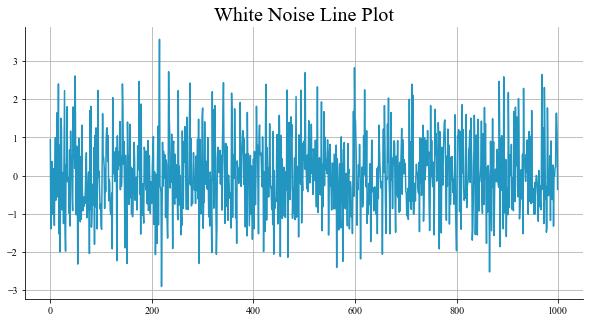

In [2]:
import matplotlib.pyplot as plt

plt.rc('font',family='Times New Roman',size=18)    # Font setting
fig0, ax0 = plt.subplots(figsize=(10,5))
series.plot(ax=ax0, c="#2295c1")

ax0.set_title('White Noise Line Plot',fontsize=20)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.grid()
plt.show()

**Histogram & kernel density plot**<br>
As our data are sampled from a Gaussian process, the distribution exhibits standard normal distribution.

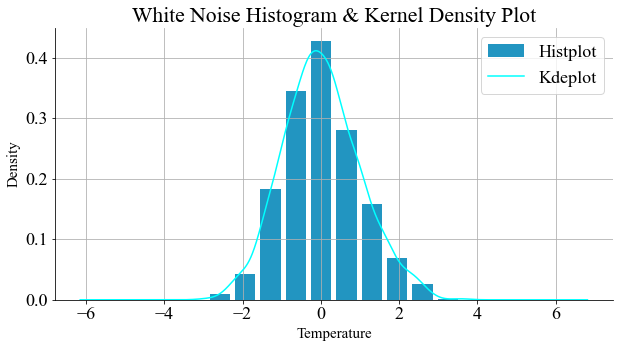

In [3]:
plt.rc('font',family='Times New Roman',size=18)    # Font setting
fig1, ax1 = plt.subplots(figsize=(10,5))

series.plot(kind='hist', density=True, color="#2295c1",label="Histplot",rwidth=0.8, ax=ax1)
series.plot(kind='kde', label="Kdeplot", color='cyan', ax=ax1)

ax1.set_title('White Noise Histogram & Kernel Density Plot')
ax1.set_xlabel('Temperature', fontsize=15)
ax1.set_ylabel('Density', fontsize=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid()
plt.legend()
plt.show()

**Autocorrelation Plot**<br>
Based on the result of autocorrelation function (ACF), there is no autocorrelation present in our synthetic white noise series.

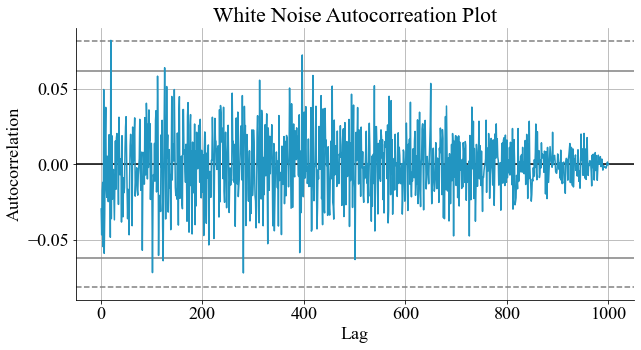

In [4]:
from pandas.plotting import autocorrelation_plot

plt.rc('font',family='Times New Roman',size=18)    # Font setting
fig2, ax2 = plt.subplots(figsize=(10,5))

autocorrelation_plot(series, ax=ax2, color="#2295c1")
ax2.set_title('White Noise Autocorreation Plot')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

### **Autoregressive (AR) model & Moving Average (MA) process**

In this part, we concentrate on the analysis of **Univariate Time Series**, where the goal is to predict future values of a variable based solely on its past data. As a result, we primarily consider the relationship between target varible and its lagged terms.

#### **Autoregressive model(AR)**

A popular example of time series of the process:  
$$y_t = \beta_0 + \beta_ty_{t-1} + \epsilon_t (t=2,…,T)$$
where error term $\epsilon_t$ is white noise.<br>
This process is called an **autoregressive process of order one** (AR(1)). <br>

AR is effective for predicting trends in phenomena influenced by their own past values.  When it comes to more complicated social-economic events, it is preferable to incorporate other variables correlated with the target varible rather than relying solely on AR model.

#### **Moving average process(MA)**

Another simple example of time series is **Moving Average Process**(MA model).
$$y_t = \mu+\epsilon_t+\theta\epsilon_{t-1}$$
where $\epsilon_t$ is white noise, and its coefficient is standardized to 1.<br>
In this situation, $y_t$ can be regarded as the moving average of white noise.

#### **Autoregressive Moving Average(ARMA) model**

We consider to combine AR model and MA model to fit the data better, resulting in an  **Autoregressive Moving Average(ARMA)** model:
$$y_t = \beta_0 + \beta_1y_{t-1}+…+\beta_py_{t-p}+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_q\epsilon_{t-q}$$

where $\epsilon_t$ represents white noise. Under the condition of giving  $y_1,…, y_p$ and assuming $\epsilon_0=…=\epsilon_{1-q}$, Maximum Likelyhood Estimation(MLE) can be employed to estimate the parameters of the ARMA model.

#### **Identifying the numbers of AR or MA terms in an ARMA model**

One of the most important issues of fitting an ARMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the time series. It might be feasible for us to try different combination to determine the optimal fit. However, there is a more systematic approach to address the same question.

**ACF & PACF plots**<br>
Thanks for the tutorial [Identifying the numbers of AR or MA terms in an ARIMA model](https://people.duke.edu/~rnau/411arim3.htm)

- **A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags**. For example, if we are regressing a variable $y_t$ on other variables $y_{t-1}$, $y_{t-2}$, and $y_{t-3}$, the partial correlation between $y_t$ and $y_{t-3}$ is the amount of correlation between $y_t$ and $y_{t-3}$ that is not explained by their common correlations with $y_{t-1}$ and $y_{t-2}$.

- **AR Signatures**<br>
If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an **AR signature**, meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. **The lag at which the PACF cuts off is the indicated number of AR terms.**
- **MA Signatures**<br>
If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative, we say that the stationarized series displays an **MA signature**, meaning that that an MA term can "partially cancel" an order of differencing in the forecasting equation. **The lag at which the ACF cuts off is the indicated number of MA terms.**

- **ARMA model**<br>
It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed ARMA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge.

**Fig.1** ACF & PACF plots and their recommanded model
<br><br>
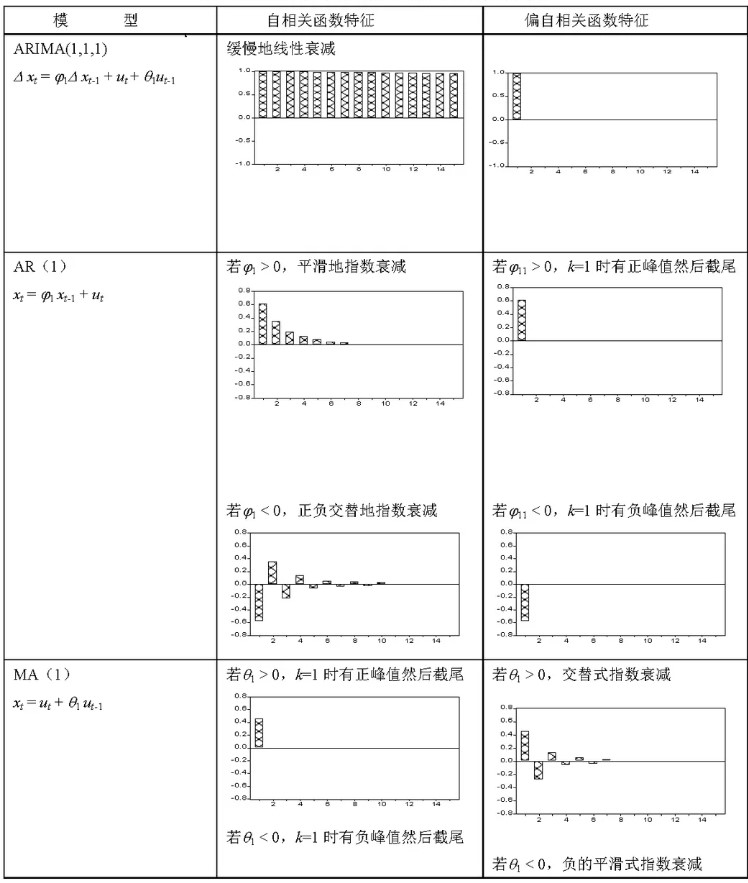

In the following part, we will take minimum temperature data as an example, model the dynamic trend and predict future values utlizing time series analysis models we mentioned above.

### **Example - Analysis of stationary time series data**

#### **Data Description**
<br>
The data we used in this section depicts the minmum daily temperature in Melbourne, Australia between 1981 and 1990,measured in degrees Celsius (℃). The data source is the Australian Bureau of Meteorology, with a total of 3650 observations.<br>

#### **Step.1  Load data & Visualization**

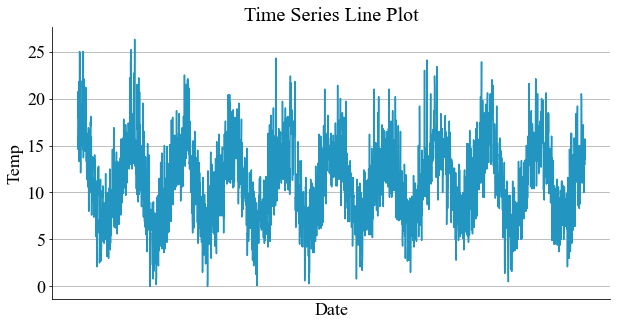

In [5]:
import os 
import pandas as pd
import numpy as np

os.chdir(r'./da')
data = pd.read_csv(r'visual.csv')

plt.rc('font',family='Times New Roman', size=18)    # Font setting

fig3,ax3 = plt.subplots(figsize=(10,5))
data['Temp'].plot(ax=ax3, c="#2295c1")

# axis setting
ax3.set_xlabel('Date')
ax3.set_ylabel('Temp')
ax3.set_title('Time Series Line Plot',fontsize=20)
ax3.set_xticks([])
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.grid(True)
plt.show()

#### **Step.2 Examine the autocorrelation within the provided dataset**
**Lag Plot**<br>
Based on the relationship between values of $y_t$ & $y_{t+1}$, there is autocorrelation presented in temperature fluctuations.

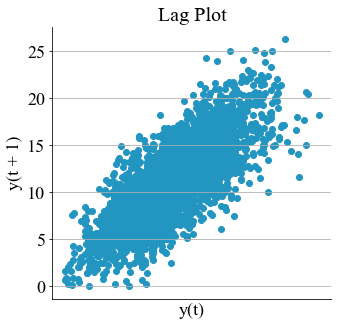

In [6]:
from pandas.plotting import lag_plot

fig4,ax4 = plt.subplots(figsize=(5,5))
lag_plot(data['Temp'], ax=ax4, c="#2295c1")

# axis setting
ax4.set_title('Lag Plot',fontsize=20)
ax4.set_xticks([])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.grid(True)
plt.show()

**ACF & PACF**<br>
In addition, we plot autocorrelation function(ACF) and partial autocorrelation function(PACF) to determine the lag order.

Based on the results of ACF & PACF, the fluctuations of temperature display an **AR Signature** for slowly decayed ACF and sharp cutoff PACF. As a result, it is recommanded to utilize an **AR model** or **ARDL model** to predict the dynamic changes in minimum temperature.

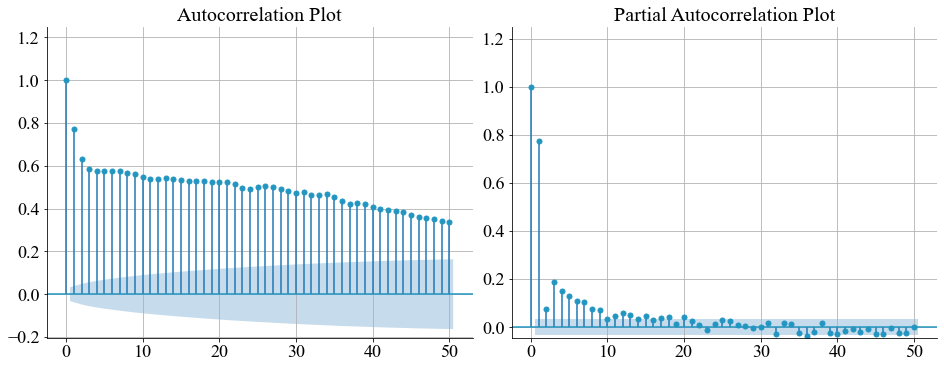

In [7]:
import statsmodels.api as sm

fig5,axs5 = plt.subplots(1,2,figsize=(13,5),constrained_layout=True)
sm.graphics.tsa.plot_acf(data['Temp'],lags=50, ax=axs5[0], color="#2295c1", auto_ylims=True)
axs5[0].set_title('Autocorrelation Plot', fontsize=20)
axs5[0].grid()
axs5[0].spines['right'].set_visible(False)
axs5[0].spines['top'].set_visible(False)

sm.graphics.tsa.plot_pacf(data['Temp'],lags=50, ax=axs5[1],  color="#2295c1", auto_ylims=True)
axs5[1].set_title('Partial Autocorrelation Plot', fontsize=20)
axs5[1].grid()
axs5[1].spines['right'].set_visible(False)
axs5[1].spines['top'].set_visible(False)
plt.show()

#### **Step.3 Unit root test**

Checking the stationarity of temperature fluctuations using unit root test, we will introduce the intuition and principles of unit root test later in non-stationary time series analysis.

The result of unit root test shows that temperature fluctuations exhibit stationarity at the 1% significance level.

In [8]:
print('Unit root test for temperature fluctuations:')
print(' ')
print(sm.tsa.stattools.adfuller(data['Temp']))

Unit root test for temperature fluctuations:
 
(-4.444804924611692, 0.00024708263003610746, 20, 3629, {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}, 16642.822304301197)


#### **Step.4 Predict dynamic changes of minimum temperature utlizing different time series models**

As a result of compound error, AR & MA models perform poorly in predicting long-term values of time series. Therefore, in our tutorial, we exclusively assess the model's performance on the next period.<br>
<br>
**AR Model**

In [9]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)    # Ignore all the future warning
warnings.filterwarnings('ignore', category=UserWarning)     # Ignore all the user warning

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8618.979
Date:                Sat, 13 Jul 2024   AIC                          17245.958
Time:                        21:51:52   BIC                          17270.767
Sample:                             0   HQIC                         17254.793
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1908      0.207     53.962      0.000      10.784      11.597
ar.L1          0.7155      0.015     47.484      0.000       0.686       0.745
ar.L2          0.0772      0.016      4.853      0.0

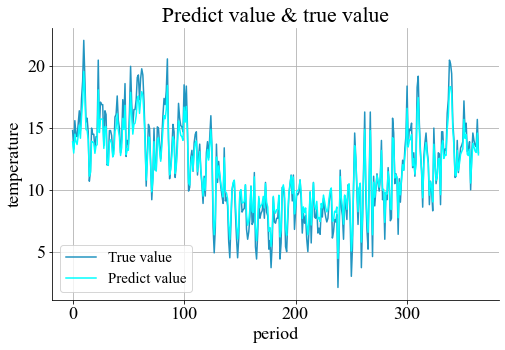

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=data['Temp'].values

model = ARIMA(X, order=(2,0,0))    # AR(2)
model_fit = model.fit()
print(model_fit.summary())

ypred = model_fit.predict(start=3286, end=3650)
ytrue = X[(len(X)-365):]

error = mean_squared_error(y_true=ytrue, y_pred=ypred)
print('Test MSE: %.2f' % error)
r2_score1 = r2_score(y_true=ytrue, y_pred=ypred)
print('R2_score: %.2f' % r2_score1)

# Visualizing the result
fig6,ax6 = plt.subplots(figsize=(8,5))

ax6.plot(ytrue, color="#2295c1", label='True value')
ax6.plot(ypred, color='cyan', label='Predict value')
ax6.set_title('Predict value & true value')
ax6.set_xlabel('period')
ax6.set_ylabel('temperature')
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.grid()
ax6.legend(loc='lower left', fontsize=15)

plt.show()

**Moving average process**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X=data['Temp'].values

model = ARIMA(X, order=(0,0,3))    # AR(0), MA(3) for example
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -8850.098
Date:                Sat, 13 Jul 2024   AIC                          17710.196
Time:                        21:51:54   BIC                          17741.208
Sample:                             0   HQIC                         17721.240
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1808      0.114     98.424      0.000      10.958      11.403
ma.L1          0.7737      0.015     50.130      0.000       0.743       0.804
ma.L2          0.4664      0.018     25.466      0.0

Test MSE: 2.18
R2_score: 0.85


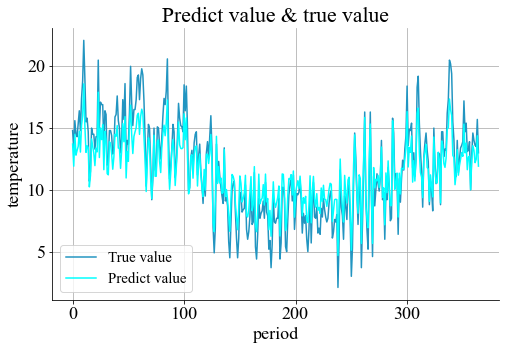

In [12]:
ypred = model_fit.predict(start=3286, end=3650)
ytrue = X[(len(X)-365):]

error = mean_squared_error(y_true=ytrue, y_pred=ypred)
print('Test MSE: %.2f' % error)
r2_score2 = r2_score(y_true=ytrue, y_pred=ypred)
print('R2_score: %.2f' % r2_score2)

# Visualizing the result
fig7,ax7 = plt.subplots(figsize=(8,5))

ax7.plot(ytrue, color="#2295c1", label='True value')
ax7.plot(ypred, color='cyan', label='Predict value')
ax7.set_title('Predict value & true value')
ax7.set_xlabel('period')
ax7.set_ylabel('temperature')
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.grid()
ax7.legend(loc='lower left', fontsize=15)

plt.show()

**ARMA Model**

In [13]:
X=data['Temp'].values

model1 = ARIMA(X, order=(1,0,3))    # AR(1), MA(3) for example
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -8383.390
Date:                Sat, 13 Jul 2024   AIC                          16778.780
Time:                        21:51:57   BIC                          16815.995
Sample:                             0   HQIC                         16792.033
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4770      0.805     14.254      0.000       9.899      13.055
ar.L1          0.9925      0.002    437.146      0.000       0.988       0.997
ma.L1         -0.4007      0.015    -26.268      0.0

Test MSE: 1.50
R2_score: 0.90


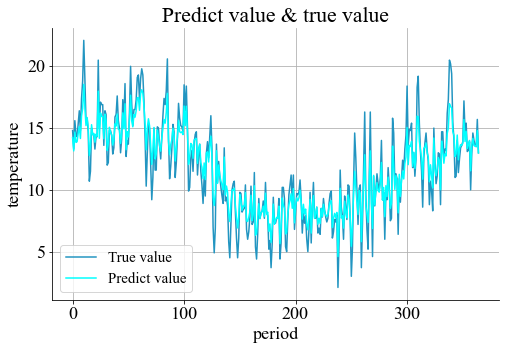

In [14]:
ypred1 = model_fit1.predict(start=3286, end=3650)
ytrue1 = X[(len(X)-365):]

error1 = mean_squared_error(y_true=ytrue1, y_pred=ypred1)
print('Test MSE: %.2f' % error1)
r2_score3 = r2_score(y_true=ytrue1, y_pred=ypred1)
print('R2_score: %.2f' % r2_score3)

# Visualizing the result
fig8,ax8 = plt.subplots(figsize=(8,5))

ax8.plot(ytrue1, color="#2295c1", label='True value')
ax8.plot(ypred1, color='cyan', label='Predict value')
ax8.set_title('Predict value & true value')
ax8.set_xlabel('period')
ax8.set_ylabel('temperature')
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.grid()
ax8.legend(loc='lower left', fontsize=15)

plt.show()

The steps above provide a general way to modeling stationary time series data, then we can use the fitted model to predict the minimum temperature of the next period.

## Non-stationary time series analysis

In the former section of this chapter, we emphasis the importance of stationarity in time series analysis. However,  most of the social-economic phonomenons exhibit trend and seasonality, highlighting their **Non-stationary** nature. Therefore, it is crucial for researchers to master the analysis of non-stationary time series data.

### **Unit root test for stationarity**

The fundamental question is how to test the stationarity of the data. In addition to assessing stationarity based on the characteristics of line plots, a more precise method known as the **Unit Root Test** is available for this purpose.

- **Unit root**<br>
In simpler terms, a unit root in a time series indicates that the series is non-stationary, meaning that its statistical properties such as mean and variance are not constant over time.<br>
<br>
Therefore, what is unit root? Here's the defination:<br>
Consider a discrete-time stochastic process ($y_t, t=1,2,3,...$), and suppose that it can be written as an autoregressive process of order p:
$$y_t=a_1y_{t-1}+a_2y_{t-2}+...+a_py_{t-p}+\epsilon_t$$
where $\epsilon_t, t=0,1,2,...,$ is a serially uncorrelated, zero-mean stochastic process with constant variance $\sigma^2$. A **unit root** exists in the AR/MA parts of the model if the sum of the AR/MA coefficients is exactly equal to 1, which means the series is grossly overdifferenced.<br>
<br>
- **Dickey-Fuller Test or Augmented Dickey-Fuller(ADF) test**<br>
    In general, we tend to use [statsmodels.tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) to test for a unit root process in a univariate process in the presence of seria correltaion.
  <br>In statistics, an Augmented Dickey-Fuller test(ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is stationary or trend-stationary in the same time series.

### **Methods for Processing Non-stationary Time Series**
There are several methods available to transform non-stationary time-series data into stationary data.
- Differencing;
- Processing time series data with logarithm;
- Incorporating time $t$ into regression model when dealing with data that exhibits a trend.

#### **Order of integration**
What if the time series data remains non-stationary after differencing?  


**Order of integration** is a summary statistic used to describe a unit root process in time series analysis. It tells you the minmum number of differences needed to get a stationary series.

#### **Autoregressive Integration Moving Average(ARIMA) model**

By incorporating **Order of Integration** into an ARMA model, we can develope an ARIMA model, which is specially designed to handle non-stationary time series.

### **Example - Analysis of non-stationary time series data**

#### **Data description**

The data utilized in this section illustrates simultaneous GDP fluctuations for both the USA and Australia. Sourced from publicly available data on the internet, it spans a total of 126 periods.

#### **Step.1 Exploratory data analysis**

The original GDP fluctuations exhibit trend based on the result of line plot. Therefore, **GDP data is non-stationary**.

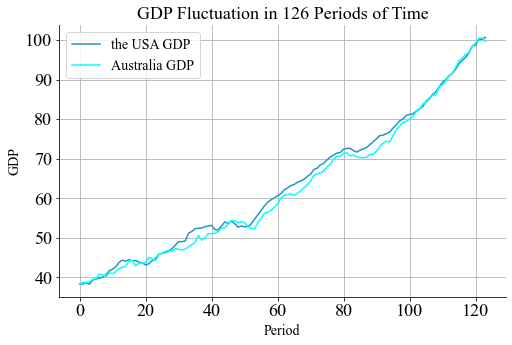

In [15]:
GDP_data = pd.read_stata(r'./gdp.dta')

# Line plot
plt.rc('font',family='Times New Roman')    # Font setting
fig9, ax9 = plt.subplots(figsize=(8,5))
ax9.plot(GDP_data['usa'], c="#2295c1", label='the USA GDP')
ax9.plot(GDP_data['aus'], c='cyan', label='Australia GDP')

ax9.set_xlabel('Period', fontsize=14)
ax9.set_ylabel('GDP', fontsize=14)
ax9.set_title('GDP Fluctuation in 126 Periods of Time', fontsize=18)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.legend(loc='upper left', fontsize=14)
ax9.grid()
plt.show()

#### **Step.2 Unit root test for GDP fluctuations**

Baesd on result of augment Dickey-Fuller test, we can conclude that the original GDP fluctuantions in the USA and Australia are non-stationary. However, the first order difference of GDP is significance at the 1% level, therefore, **we successfully transform the non-stationary GDP data into stationary time series with the help of differencing**.

In [16]:
# Unit root test for original GDP and its first order difference
diff_USA = GDP_data['usa'].diff()
diff_AUS = GDP_data['aus'].diff()

print('ADF test for the original GDP in the USA')
print(sm.tsa.stattools.adfuller(GDP_data['usa']))
print('_'*30)
print('ADF test for the original GDP in Australia')
print(sm.tsa.stattools.adfuller( GDP_data['aus']))
print('_'*60)

print('ADF test for the first order difference of GDP in the USA ')
print(sm.tsa.stattools.adfuller(diff_USA.dropna()))
print('_'*30)
print('ADF test for the first order difference of GDP in the Australia')
print(sm.tsa.stattools.adfuller(diff_AUS.dropna()))

ADF test for the original GDP in the USA
(2.885235713379514, 1.0, 12, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 150.4730503468139)
______________________________
ADF test for the original GDP in Australia
(2.9779278583961406, 1.0, 0, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 217.96337968461836)
____________________________________________________________
ADF test for the first order difference of GDP in the USA 
(-2.7160229130824693, 0.07130640839100755, 11, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 151.3886957424131)
______________________________
ADF test for the first order difference of GDP in the Australia
(-4.437897933862063, 0.0002541983407082523, 2, 120, {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}, 220.7388815869264)


#### **Step.3 Identifying the orders of AR and MA terms**  


**Plot ACF & PACF - Taking USA as an exaple**<br>  


Based on the result of ACF & PACF, the differenced series displays a sharp cutoff, which exhibit a **MA signature**, and the recommanded order of MA term is 2.

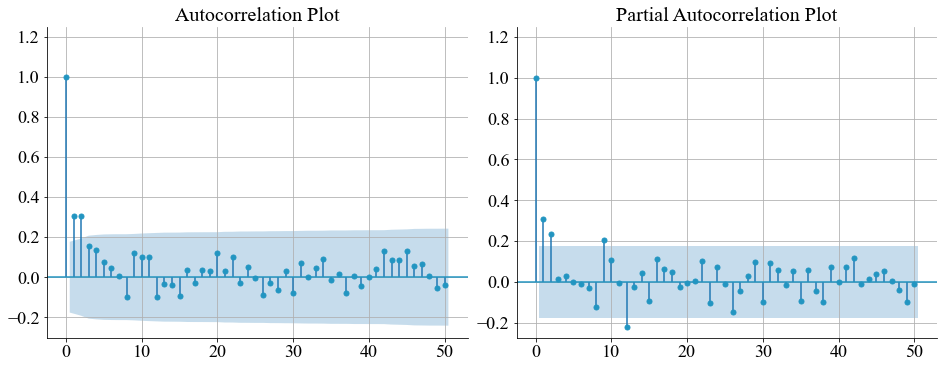

In [17]:
fig10,axs10 = plt.subplots(1,2,figsize=(13,5),constrained_layout=True)
sm.graphics.tsa.plot_acf(diff_USA.dropna(),lags=50, ax=axs10[0], color="#2295c1", auto_ylims=True)
axs10[0].set_title('Autocorrelation Plot', fontsize=20)
axs10[0].grid()
axs10[0].spines['right'].set_visible(False)
axs10[0].spines['top'].set_visible(False)

sm.graphics.tsa.plot_pacf(diff_USA.dropna(),lags=50, ax=axs10[1],  color="#2295c1", auto_ylims=True)
axs10[1].set_title('Partial Autocorrelation Plot', fontsize=20)
axs10[1].grid()
axs10[1].spines['right'].set_visible(False)
axs10[1].spines['top'].set_visible(False)
plt.show()

#### **Step.4 Predicting GDP fluctuations utlizing ARIMA model**  


Similarly, we take the GDP fluctuation of the USA as an example.

In [18]:
X=GDP_data['usa'].values

model_USA = ARIMA(X, order=(1,1,2))    # AR(1), MA(2) for example
GDP_fit = model_USA.fit()
print(GDP_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  124
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -88.177
Date:                Sat, 13 Jul 2024   AIC                            184.355
Time:                        21:51:59   BIC                            195.603
Sample:                             0   HQIC                           188.924
                                - 124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9957      0.011     93.115      0.000       0.975       1.017
ma.L1         -0.7580      0.092     -8.271      0.000      -0.938      -0.578
ma.L2         -0.1303      0.090     -1.449      0.1

Test MSE: 12.07
R2_score: 0.96


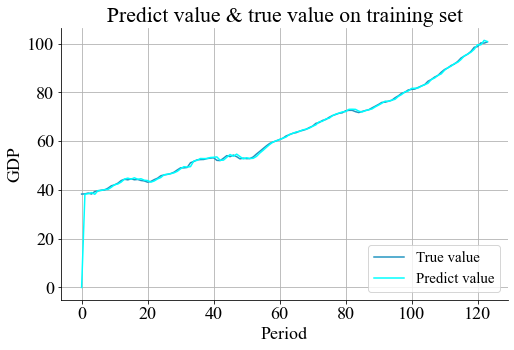

In [19]:
ypred_GDP = GDP_fit.predict(start=0, end=123)
ytrue_GDP = X

error1 = mean_squared_error(y_true=ytrue_GDP, y_pred=ypred_GDP)
print('Test MSE: %.2f' % error1)
r2_score3 = r2_score(y_true=ytrue_GDP, y_pred=ypred_GDP)
print('R2_score: %.2f' % r2_score3)

# Visualizing the result
fig11,ax11 = plt.subplots(figsize=(8,5))

ax11.plot(ytrue_GDP, color="#2295c1", label='True value')
ax11.plot(ypred_GDP, color='cyan', label='Predict value')
ax11.set_title('Predict value & true value on training set')
ax11.set_xlabel('Period')
ax11.set_ylabel('GDP')
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.grid()
ax11.legend(loc='lower right', fontsize=15)

plt.show()